### TITANIC (KAGGLE)
#### Luan Alecxander Krzyzaniak - 2023/2
Includes code for SVM, K-Neighbors and Gradient Boosting

In [760]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sn

In [761]:
from pandas import read_csv

trainfile = read_csv("./input/train.csv")
testfile = read_csv("./input/test.csv")

trainDF = trainfile
testDF = testfile

### FUNCTIONS

Basic panda's scoring

In [762]:
def scoring(classifier, X_train, Y_train, X_test, Y_test):
    classifier.fit(X_train, Y_train)
    score = classifier.score(X_test, Y_test)
    return score

### DATA PLOTTING


In [763]:
trainfile.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [764]:
trainfile.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Pclass', ylabel='Survived'>

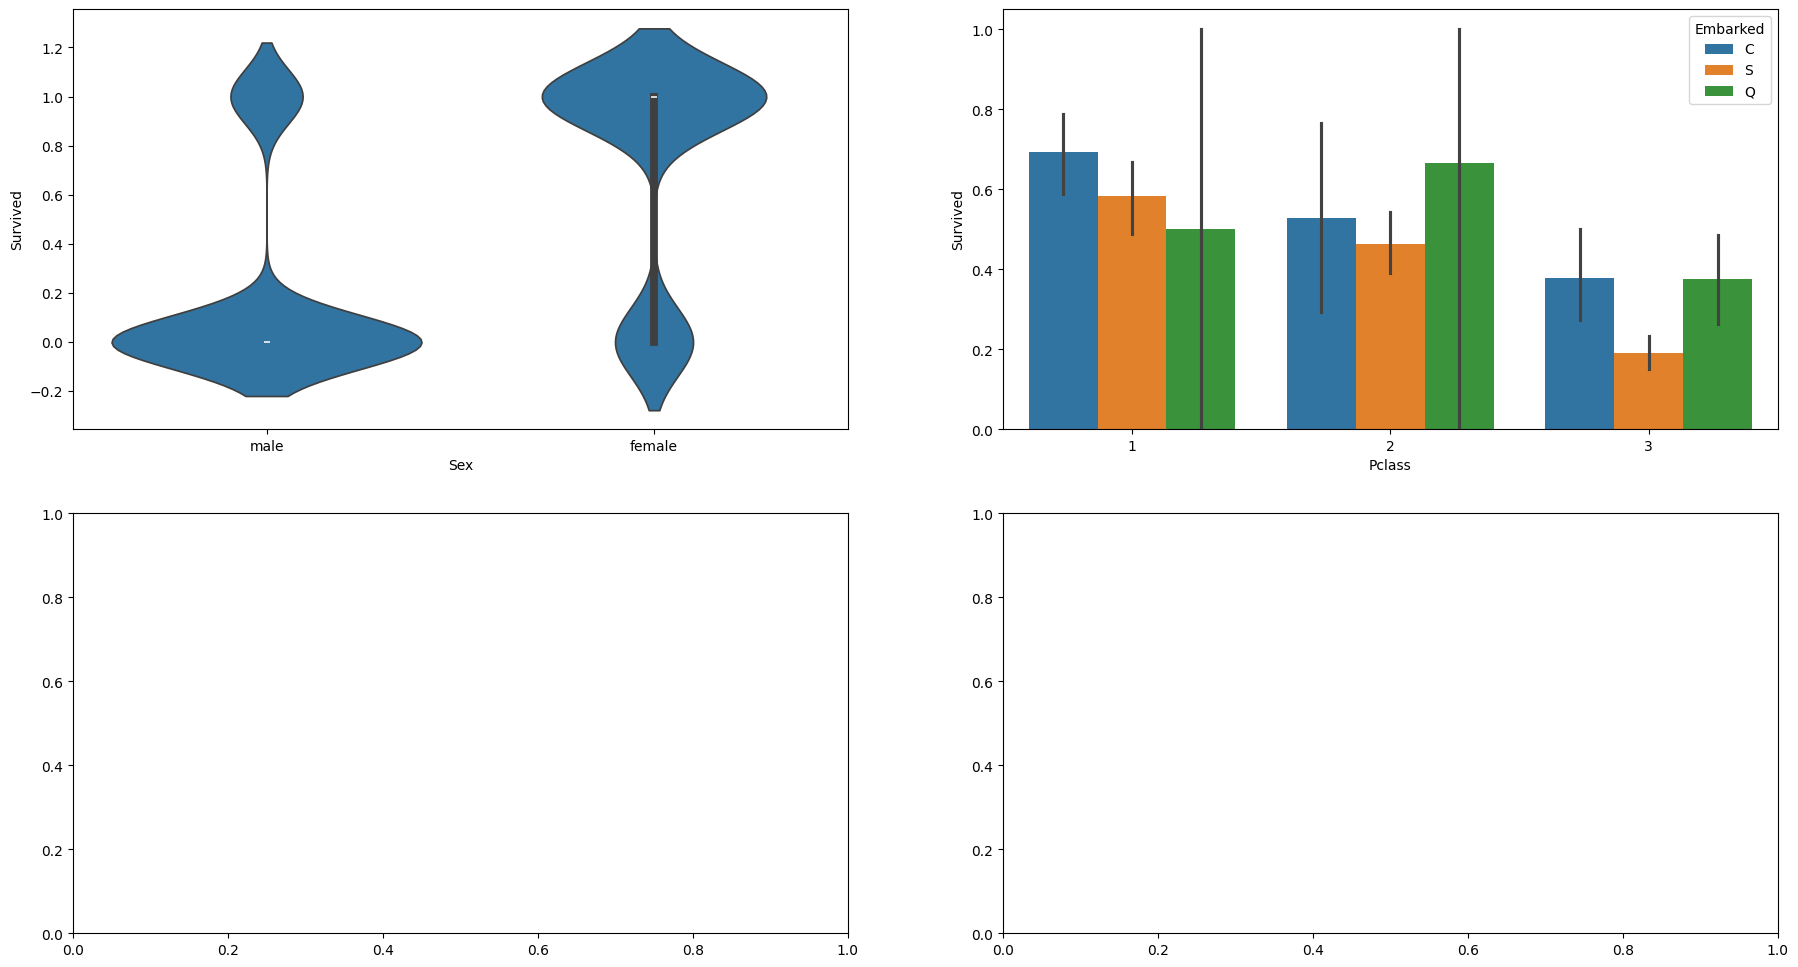

In [765]:
f, ax = plt.subplots(2, 2,figsize=[22,12])
sn.violinplot(x = 'Sex', y = 'Survived', data = trainfile,ax = ax[0,0])
sn.barplot(x = 'Pclass',y ='Survived',data = trainfile,hue = 'Embarked',ax = ax[0,1])


<Axes: xlabel='Pclass'>

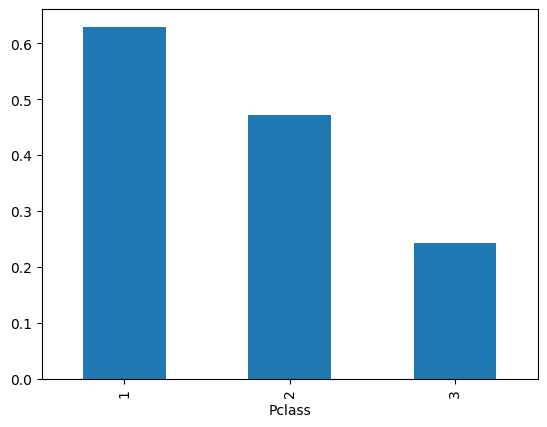

In [766]:
trainfile.groupby('Pclass').Survived.mean().plot(kind='bar')

<Axes: xlabel='Pclass'>

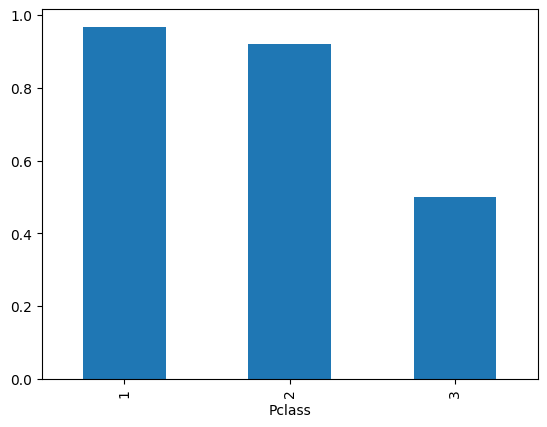

In [767]:
trainfile.query('Sex == "female"').groupby('Pclass').Survived.mean().plot(kind='bar')

<Figure size 1700x600 with 0 Axes>

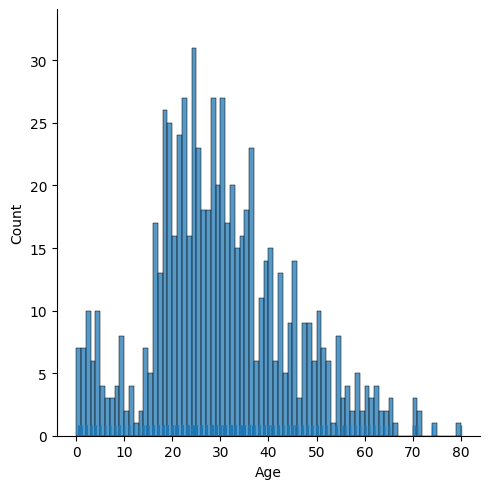

In [768]:
plt.figure(figsize = [17,6])
a = sn.displot(trainfile['Age'].dropna(),bins = range(0,81,1), rug = True)

### DATA TREATMENT

Preparing sets

Factorizing - changing discrete values to classified values

In [769]:
data = [trainDF, testDF]

for dataset in data:
    dataset['Sex']=pd.factorize(dataset['Sex'])[0] # F=0 M=1
    dataset['Embarked']=pd.factorize(dataset['Embarked'])[0] # C=0 Q=1 S=2

for dataset in data:
    dataset["Family"] = dataset['SibSp'] + dataset['Parch']
    dataset = dataset.drop(columns=["SibSp", "Parch"])


                                                
trainDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0


In [770]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
# for dataset in data:
#     dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
#     dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
#     dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
#     dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
#     dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
#     dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    
# for dataset in data:
#     dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['Family']+1)
#     mean = dataset['Fare_Per_Person'].mean()
#     dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].fillna(mean)
    
    
trainDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U0,0,1,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U0,0,0,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U0,0,0,8


In [771]:
dropped = ["PassengerId", "Name", "Ticket", "Age", "Fare", "Cabin"]

trainDF_y = trainDF["Survived"]
trainDF = trainDF.drop(columns=dropped + ["Survived"])
testDF = testDF.drop(columns=dropped)

trainDF.head()

,Pclass,Sex,SibSp,Parch,Embarked,Family,Deck
0,3,0,1,0,0,1,8
1,1,1,1,0,1,1,3
2,3,1,0,0,0,0,8
3,1,1,1,0,0,1,3
4,3,0,0,0,0,0,8


### SCORING

In [772]:
from sklearn.model_selection import train_test_split

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, X_test, Y_train, Y_test = train_test_split(trainDF, trainDF_y, test_size=0.2, random_state=0)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 140 to 684
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    712 non-null    int64
 1   Sex       712 non-null    int64
 2   SibSp     712 non-null    int64
 3   Parch     712 non-null    int64
 4   Embarked  712 non-null    int64
 5   Family    712 non-null    int64
 6   Deck      712 non-null    int32
dtypes: int32(1), int64(6)
memory usage: 41.7 KB


Cross validation and scoring using sklearn's `cross_val_score`  

In [773]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

clf_svm = SVC(kernel='poly')
clf_kn = KNeighborsClassifier(n_neighbors=1)
clf_gb = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5)

Classifiers = ['SVM', 'K-Neighbors', 'GradientBoosting']
scores = []
models = [clf_svm, clf_kn, clf_gb]
for model in models:
    score = cross_val_score(model, trainDF, trainDF_y, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)
    
scoretable = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score',
            ascending = False)

scoretable

,score
GradientBoosting,0.789014
SVM,0.782285
K-Neighbors,0.736167


Scoring using panda's `.score`

In [774]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report as cr

print(scoring(clf_svm, X_train, Y_train, X_test, Y_test))
print(scoring(clf_kn, X_train, Y_train, X_test, Y_test))
print(scoring(clf_gb, X_train, Y_train, X_test, Y_test))

y_svm = clf_svm.predict(X_test)
print(cr(y_svm, Y_test))

0.8268156424581006
0.776536312849162
0.8212290502793296
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        95
           1       0.88      0.73      0.80        84

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.83      0.83      0.82       179



### SUBMIT GENERATION

Support Vector Machine

In [775]:
testDF.isna().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
Family      0
Deck        0
dtype: int64

In [776]:
clf_svm.fit(trainDF, trainDF_y)

predictions = clf_svm.predict(testDF)

output = pd.DataFrame({'PassengerId': testfile['PassengerId'], 'Survived': predictions})
output.to_csv('./output/svm.csv', index=False)

K-Neighbors

In [777]:
clf_kn.fit(trainDF, trainDF_y)

predictions = clf_kn.predict(testDF)

output = pd.DataFrame({'PassengerId': testfile['PassengerId'], 'Survived': predictions})
output.to_csv('./output/kneighbors.csv', index=False)

Gradient Boosting

In [778]:
clf_gb.fit(trainDF, trainDF_y)

predictions = clf_gb.predict(testDF)

output = pd.DataFrame({'PassengerId': testfile['PassengerId'], 'Survived': predictions})
output.to_csv('./output/gradientboosting.csv', index=False)

#### CREDITS